# Titanic Survival Prediction

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [184]:
df=pd.read_csv(r'C:\Users\Prasad\Downloads\titanic data\tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print("Titanic data size :",df.size)
print("Titanic data shape :",df.shape)

Titanic data size : 5016
Titanic data shape : (418, 12)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
# checking for the null value
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [119]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())



In [120]:
df.isna().sum()/len(df)*100

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [185]:
# Cabin columns contains most missing value value percent 
df=df.drop(['Cabin','PassengerId','Name','Ticket'],axis=1)
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S


## Visualization of Data

Text(0.5, 1.0, 'Sex Count')

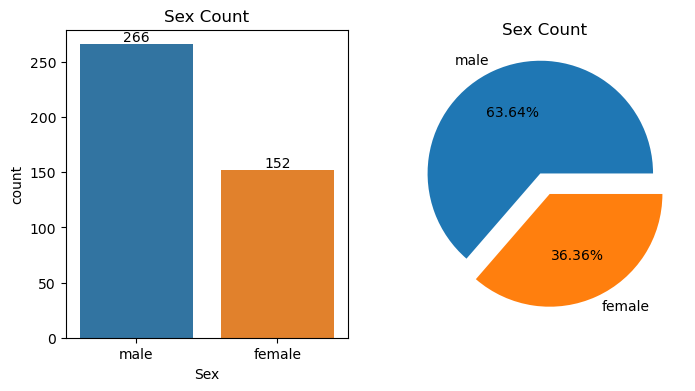

In [123]:
df['Sex'].value_counts()

plt.figure(figsize=(8,4))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Sex',data=df)
ax.bar_label(ax.containers[0])
plt.title("Sex Count")

ax=plt.subplot(1,2,2)
ax= plt.pie(df['Sex'].value_counts(),labels=df['Sex'].value_counts().index,autopct='%1.2f%%',explode=[0.1,0.1])
plt.title('Sex Count')

From visualisation we noticed that,63.64% male and 36.36% female on the Titanic Ship.

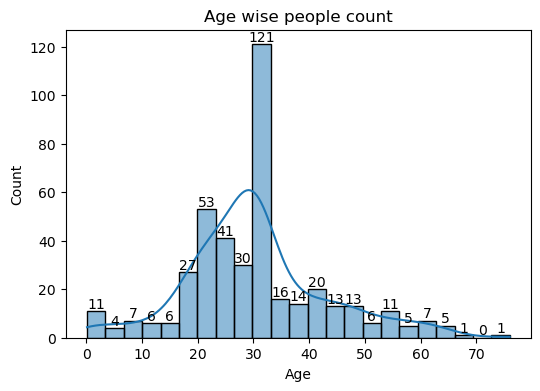

In [34]:
plt.figure(figsize=(6,4))
ax=sns.histplot(df,x=df['Age'],kde=True,)
ax.bar_label(ax.containers[0])
plt.title("Age wise people count")
plt.show()

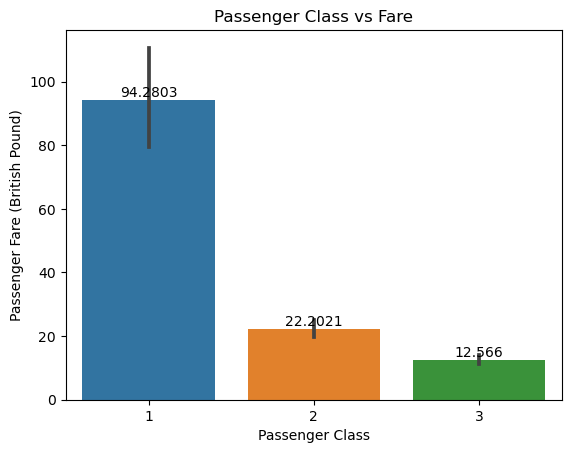

In [39]:
ax=sns.barplot(y=df['Fare'],x=df['Pclass'])
ax.bar_label(ax.containers[0])
plt.xlabel("Passenger Class")
plt.ylabel("Passenger Fare (British Pound)")
plt.title("Passenger Class vs Fare")
plt.show()

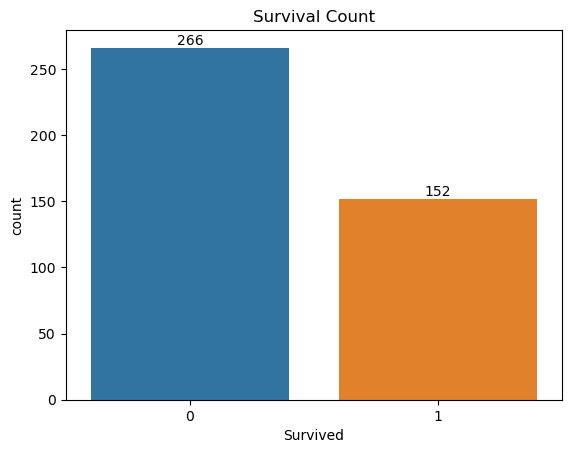

In [44]:
ax=sns.countplot(data=df,x='Survived')
ax.bar_label(ax.containers[0])
plt.title("Survival Count")
plt.show()

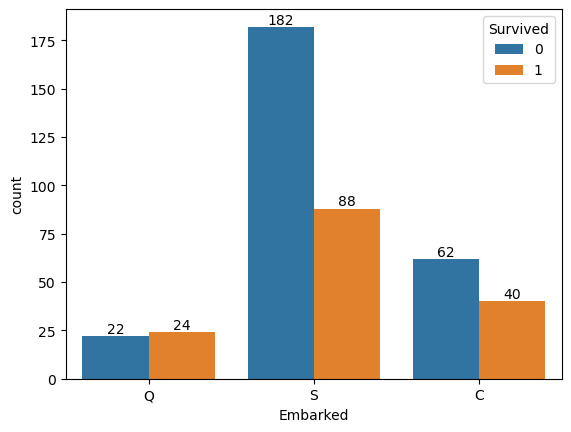

In [49]:
ax=sns.countplot(data=df,x='Embarked',hue='Survived')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

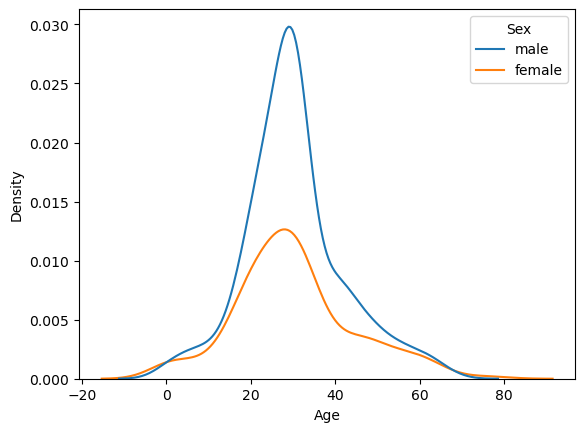

In [69]:
sns.kdeplot(data=df,x='Age',hue='Sex')
plt.show()

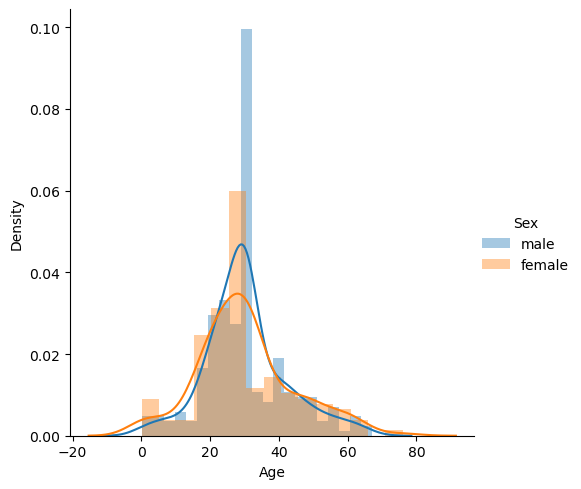

In [68]:
sns.FacetGrid(df,hue='Sex',height=5).map(sns.distplot,'Age').add_legend()
plt.show()

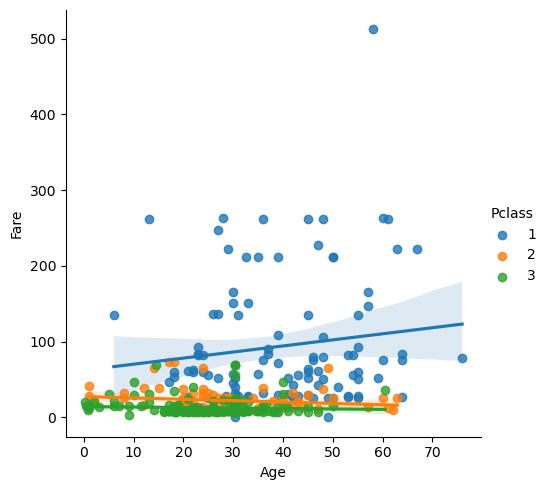

In [50]:
sns.lmplot(x="Age",y="Fare",hue='Pclass',data=df)

<AxesSubplot:>

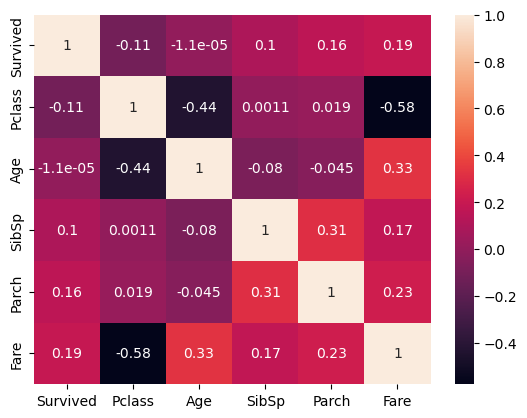

In [63]:
sns.heatmap(df.corr(),annot=True)

## Categorical value converted into numerical value by using categorical_encoder

In [124]:
# converting categorical value into numerical value by using categorical_encoder
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['Survived','Pclass','Sex','Embarked'])
df_encoded=encoder.fit_transform(df)
df_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,34.5,0,0,7.8292,1
1,2,1,2,47.0,1,0,7.0000,2
2,1,2,1,62.0,0,0,9.6875,1
3,1,1,1,27.0,0,0,8.6625,2
4,2,1,2,22.0,1,1,12.2875,2


## Splitting the dataset into Independent and Dependent Variable

In [125]:
x = df_encoded.drop(['Survived'],axis=1)
y = df['Survived']

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21)

In [127]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,3,2,64.00000,0,2,83.1583,3
201,1,1,0.33000,0,2,14.4000,2
336,2,1,32.00000,0,0,13.0000,2
187,1,1,17.00000,2,0,8.0500,2
214,1,2,38.00000,4,2,7.7750,2
...,...,...,...,...,...,...,...
368,3,2,45.00000,0,1,59.4000,3
48,3,2,60.00000,0,0,76.2917,3
260,1,1,36.50000,1,0,17.4000,2
312,1,1,30.27259,0,0,7.5750,2


In [128]:
y_train

179    1
201    0
336    0
187    0
214    1
      ..
368    1
48     1
260    0
312    0
207    0
Name: Survived, Length: 292, dtype: int64

# Logistic Regression

In [132]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)


print('Training set score:{:.2f}'.format(lr.score(x_train,y_train)),'\n')
print('Test Set Score:{:.2f}'.format(lr.score(x_test,y_test)),'\n')
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test,y_pred_lr)),'\n')
print('Confusion Matrix :''\n',confusion_matrix(y_test,y_pred_lr),'\n')
print('Classification Report :'"\n",classification_report(y_test,y_pred_lr))

Training set score:1.00 

Test Set Score:1.00 

Accuracy Score: 1.00 

Confusion Matrix :
 [[76  0]
 [ 0 50]] 

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [141]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred_lr) * 100
print("Accuracy Score Of Logistic Regression :",accuracy,'%')

from sklearn import metrics

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred_lr))
print('Mean Squared Error :',metrics.mean_squared_error(y_test,y_pred_lr))
print('Root Mean Square Error :',np.sqrt(metrics.mean_absolute_error(y_test,y_pred_lr)))

Accuracy Score Of Logistic Regression : 100.0 %
Mean Absolute Error: 0.0
Mean Squared Error : 0.0
Root Mean Square Error : 0.0


# Random Forest Classifier

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
rfc=RandomForestClassifier(random_state=42)

### Hyperparameter Tunning for Random Forest Classifier

In [147]:
from sklearn.model_selection import GridSearchCV

In [149]:
param_dict={'bootstrap':[True,False],
         'max_depth': [5,10,12],
         'max_features': ['auto', 'sqrt', 'log2', None],
         'min_samples_split': [5, 10, 12],
         'n_estimators': [100, 200, 300],
         'criterion': ['gini', 'entropy']
}
cv_random_forest = GridSearchCV(estimator=rfc, cv = 5, param_grid=param_dict, n_jobs = 3)
cv_random_forest.fit(x_train, y_train)
best_params = cv_random_forest.best_params_
print("Best Hyperparameters:", best_params)
rf_best = cv_random_forest.best_estimator_
print("Best estimators:",rf_best)



Best Hyperparameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 100}
Best estimators: RandomForestClassifier(max_depth=5, min_samples_split=5, random_state=42)


#### Training the Random Forest Classifier with Best Hyperparameter

In [151]:
rfc=RandomForestClassifier(random_state=42,**best_params)
rfc

RandomForestClassifier(max_depth=5, min_samples_split=5, random_state=42)

## OOB Rate

-The oob score represent the accuracy of the model on the unseen data that is not used for training

In [152]:
rfc.set_params(warm_start=False,oob_score=True)
min_estimators=5
max_estimators=100

error_rate={}

for i in range(min_estimators,max_estimators+1):
    rfc.set_params(n_estimators=i)
    rfc.fit(x_train,y_train)
    oob_error =1-rfc.oob_score_
    error_rate[i]=oob_error
    

In [153]:
# converting dictionary to a pandas series for easy plotting

oob_series=pd.Series(error_rate)

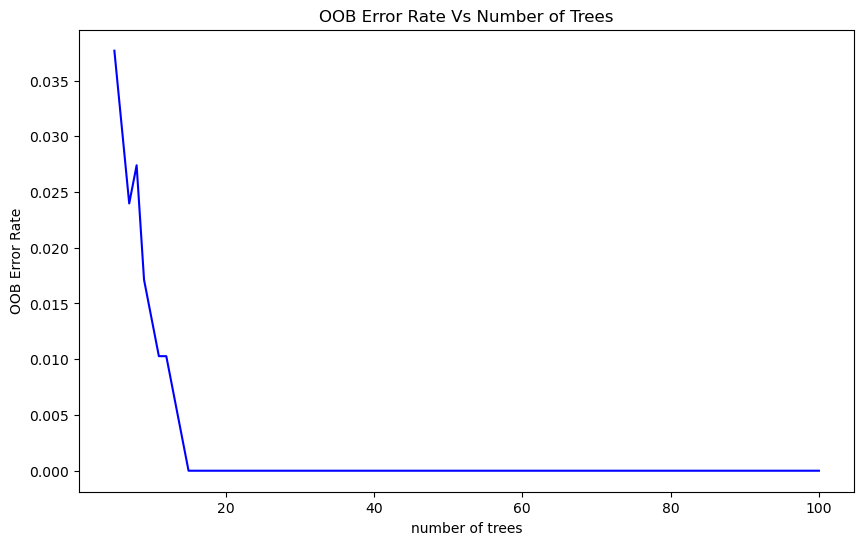

In [154]:
#
plt.figure(figsize=(10,6))
oob_series.plot(kind='line',color='blue')
plt.xlabel('number of trees')
plt.ylabel("OOB Error Rate")
plt.title('OOB Error Rate Vs Number of Trees')
plt.show()

In [155]:
print('Error rate for 100 trees is :{0:.5f}'.format(oob_series[100]))

Error rate for 100 trees is :0.00000


In [157]:
best_params['n_estimators']

100

In [158]:
rfc.set_params(n_estimators=best_params['n_estimators'],bootstrap=True,oob_score=False)


RandomForestClassifier(max_depth=5, min_samples_split=5, random_state=42)

In [177]:
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [178]:
y_pred_rf=rfc.predict(x_test)

### Outcome of the Random Forest Classifier

In [162]:
acc=metrics.accuracy_score(y_test,y_pred_rf)
print("Accuracy Score of the Random Forest Classifier {:.2f}%".format(acc*100))

Accuracy Score of the Random Forest Classifier 100.00%


In [163]:
# Prediction
predicted_df={'Predicted_value':y_pred_rf,'Original_value':y_test}
#creating the dataframe
pd.DataFrame(predicted_df).head(20)

,Predicted_value,Original_value
55,0,0
239,1,1
224,1,1
376,1,1
176,1,1
52,1,1
89,0,0
9,0,0
168,1,1
51,0,0


### Classification Report

In [164]:
print('Classification_Report :')
print(classification_report(y_pred_rf,y_test))

Classification_Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



### Confusion Matrix

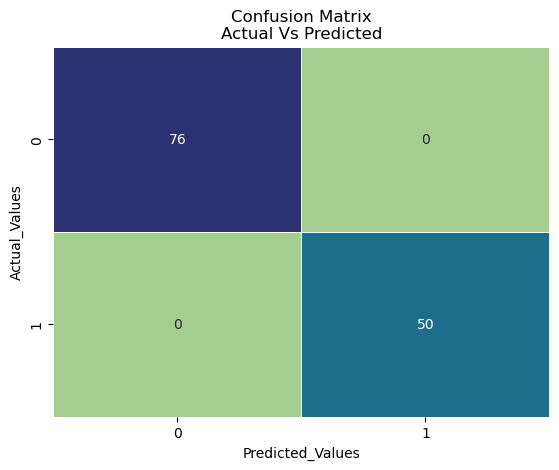

In [168]:
confusion_mat=confusion_matrix(y_pred_rf,y_test)
sns.heatmap(confusion_mat,cmap='crest',annot=True,fmt='d',cbar=False,linewidth=0.5,color='black')
plt.xlabel('Predicted_Values')
plt.ylabel('Actual_Values')
plt.title('Confusion Matrix''\n''Actual Vs Predicted')
plt.show()

### OOB Rate

In [171]:
oob_error=1-rfc.oob_score_
print("OOB_erro :",oob_error)
print('OOB_score :',rfc.oob_score_)

OOB_erro : 0.0
OOB_score : 1.0


In [182]:
acc=metrics.accuracy_score(y_test,y_pred_rf)
print("Accuracy Score of the Random Forest Classifier {:.2f}%".format(acc*100))

Accuracy Score of the Random Forest Classifier 100.00%
